## ASSUMPTION
This example is written assuming we have a service up and running for us to utilise

Copyright IBM Corp. 2022, 2023
@author James Strudwick IBM Research

## Dependencies

In [1]:
#For descriptors
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles
from mordred import Calculator, descriptors, error

In [2]:
#For PCA
# from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#For loading data
import pandas as pd
import numpy as np
# from io import StringIO

## Data recording

In [12]:
# SMILES from cheminfo.org and pubchem: propane reactant, pentane product, side product, solvent, HFIP, acid catalyst

MCP_SMILES=[r'C1(/C=C2CC\2)=CC=CC=C1', 
r'BrC(C=C1)=CC=C1/C=C2CC\2', 
r'ClC(C=C1)=CC=C1/C=C2CC\2', 
r'FC(C=C1)=CC=C1/C=C2CC\2', 
r'O=[N+](C(C=C1)=CC=C1/C=C2CC\2)[O-]',
r'COC(C=C1)=CC=C1/C=C2CC\2',
r'CN(C(C=C1)=CC=C1/C=C2CC\2)C',
r'CC(C)C(C=C1)=CC=C1/C=C2CC\2',
r'C1(/C=C2CC\2)=CC=C(C3=CC=CC=C3)C=C1',
r'CC1=CC(/C=C2CC\2)=CC=C1',
r'BrC1=CC(/C=C2CC\2)=CC=C1',
r'CC(C)C1=CC(/C=C2CC\2)=CC=C1',
r'FC(C(C=C1)=CC=C1/C=C2CC\2)(F)F',
r'CC(C=C1)=CC=C1/C=C2CC\2']#2-CH3'CC1=CC=CC=C1/C=C2CC\2' deleted due to no Hammett Const
Dimer_SMILES='c4ccc(C2=C(C1CC1)CCC2c3ccccc3)cc4'
byproduct1_SMILES='c4ccc(C3=C(c1ccccc1)C(C2CC2)CC3)cc4'
HFIP_SMILES='OC(C(F)(F)F)C(F)(F)F'
RATIO=1/2
Catalyst_SMILES=['CC1=CC=C(S(O)(=O)=O)C=C1',
'O=S(C1=CC=CC=C1)(O)=O',
'CS(=O)(O)=O',
'[H]Cl',
'F[B-](F)(F)F.[H+]',
'CC1(C)[C@]2([H])CC[C@@]1(CS(O)(=O)=O)C(C2)=O',
'OC1=C(F)C(F)=C(F)C(F)=C1F','O=S(O)(C(F)(F)F)=O',
'[H]Br','F[P-](F)(F)(F)(F)F.[H+]',
'O=C(O)C(F)(F)F',
'O=P(O)(O)O',
'O=Cl(=O)(O)=O',
'[H]I',
'O=P(OC1=CC=CC=C1)(OC2=CC=CC=C2)O',
'O=S(NS(=O)(C(F)(F)F)=O)(C(F)(F)F)=O',
'O=S(C1=CC=CC=C1C2=CN=NC(C3=NC=C(C4=CC=CC=C4S(=O)([O-])=O)C=C3)=N2)([O-])=O.[Na+].[Na+]',
'CCCC[N+](CCCC)(CCCC)CCCC.[O-]S(=O)(O)=O',
'O=P(OC1=CC=C2C(C=CC=C2)=C31)(O)OC4=C3C(C=CC=C5)=C5C=C4']
solvent_SMILES=['ClC(Cl)Cl',
                'ClCCCl',
                'ClCCl',
                'CCC(C)(O)C',
                'CC1=CC=CC=C1',
                'CC1=CC(C)=CC(C)=C1',
                'FC(F)(F)C1=CC=CC=C1',
                'FC1=C(F)C(F)=C(F)C(F)=C1F',
                'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
                'C[N+]([O-])=O',
                '[H]O[H]',
                'C1CCOC1',
                'O1CCOCC1']
cosolvent_SMILES=['FC(F)(F)C(O)C(F)(F)F',
                  r'F/C(F)=C(F)\F',
                  'FC(F)(F)C(C(F)(F)F)(O)C(F)(F)F',
                  'CC(C)(O)C',
                  'CC(O)C']
additives_SMILES=['O=S([O-])([O-])=O.[Na+].[Na+]',
                  'CC(C1=CC(C)=CC(C(C)(C)C)=C1O)(C)C',
                  '[H]O[H]','[O-][Si](=O)[O-].[O-][Si](=O)[O-].[Na+].[Al+3]',
                  'O=C1CC[C@@]2([H])[C@]3([H])CC=C4C[C@@H](OC(C)=O)CC[C@]4(C)[C@@]3([H])CC[C@]12C',
                  'CO','O1CCOCC1']
# Initiate list of rdkit or mordred molecules
rdkit_mols = [MolFromSmiles(smiles) for smiles in MCP_SMILES]

In [9]:
MCP_SMILES_dic={
    'parent Ph-MCP':r'C1(/C=C2CC\2)=CC=CC=C1', 
    '4-Br-Ph-MCP':r'BrC(C=C1)=CC=C1/C=C2CC\2', 
    '4-Cl-Ph-MCP':r'ClC(C=C1)=CC=C1/C=C2CC\2', 
    '4-F-Ph-MCP':r'FC(C=C1)=CC=C1/C=C2CC\2', 
    '4-nitro-Ph-MCP':r'O=[N+](C(C=C1)=CC=C1/C=C2CC\2)[O-]',
    '4-MeO-Ph-MCP':r'COC(C=C1)=CC=C1/C=C2CC\2',
    '4-Me2N-Ph-MCP':r'CN(C(C=C1)=CC=C1/C=C2CC\2)C',
    '4-iPr-Ph-MCP':r'CC(C)C(C=C1)=CC=C1/C=C2CC\2',
    '4-Ph-Ph-MCP':r'C1(/C=C2CC\2)=CC=C(C3=CC=CC=C3)C=C1',
    '3-CH3-Ph-MCP':r'CC1=CC(/C=C2CC\2)=CC=C1',
    '3-Br-Ph-MCP':r'BrC1=CC(/C=C2CC\2)=CC=C1',
    '2-CH3-Ph-MCP':r'CC1=CC=CC=C1/C=C2CC\2',
    '3-iPr-Ph-MCP':r'CC(C)C1=CC(/C=C2CC\2)=CC=C1',
    '4-CF3-Ph-MCP':r'FC(C(C=C1)=CC=C1/C=C2CC\2)(F)F',
    '4-CH3-Ph-MCP':'CC(C=C1)=CC=C1/C=C2CC\2'}

In [27]:
pd.DataFrame(MCP_SMILES_dic.items()).to_csv('derivatives name.csv')

In [6]:
solvent_SMILES_dic={
    'chloroform':'ClC(Cl)Cl',
                '1,2-dichloroethane':'ClCCCl',
                'dichloromethane':'ClCCl',
                'tert-amyl alcohol':'CCC(C)(O)C',
                'toluene':'CC1=CC=CC=C1',
                'mesitylene':'CC1=CC(C)=CC(C)=C1',
                'α,α,α-trifluorotoluene':'FC(F)(F)C1=CC=CC=C1',
                'hexafluorobenzene':'FC1=C(F)C(F)=C(F)C(F)=C1F',
                'perfluorohexane':'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
                'nitromethane':'C[N+]([O-])=O',
                'water':'[H]O[H]',
                'THF':'C1CCOC1',
                '1,4-dioxane':'O1CCOCC1'}

In [7]:
Catalyst_SMILES_dic={
    'ptsa': 'CC1=CC=C(S(O)(=O)=O)C=C1',
    'benzenesulfonic acid': 'O=S(C1=CC=CC=C1)(O)=O',
                  'MsOH':'CS(=O)(O)=O',
                  'HCl':'[H]Cl',
                  'HBF4':'F[B-](F)(F)F.[H+]',
                  'camphorsulfonic acid':'CC1(C)[C@]2([H])CC[C@@]1(CS(O)(=O)=O)C(C2)=O',
                  'pentafluorophenol':'OC1=C(F)C(F)=C(F)C(F)=C1F',
    'TfOH':'O=S(O)(C(F)(F)F)=O',
                  'HBr':'[H]Br',
    'HPF6':'F[P-](F)(F)(F)(F)F.[H+]',
                  'TFA':'O=C(O)C(F)(F)F',
                  'H3PO4':'O=P(O)(O)O',
                  'HClO4':'O=Cl(=O)(O)=O',
                  'HI':'[H]I',
                  'diphenyl hydrogen phosphate':'O=P(OC1=CC=CC=C1)(OC2=CC=CC=C2)O',
                  'HNTf2':'O=S(NS(=O)(C(F)(F)F)=O)(C(F)(F)F)=O',
                  'Pyridinium p-toluene sulfonate':'O=S(C1=CC=CC=C1C2=CN=NC(C3=NC=C(C4=CC=CC=C4S(=O)([O-])=O)C=C3)=N2)([O-])=O.[Na+].[Na+]',
                  'tetrabutylammonium hydrogensulfate':'CCCC[N+](CCCC)(CCCC)CCCC.[O-]S(=O)(O)=O',
                  'chiral BINOL phosphoric acid':'O=P(OC1=CC=C2C(C=CC=C2)=C31)(O)OC4=C3C(C=CC=C5)=C5C=C4'}

In [8]:
cosolvent_SMILES_dic={'HFIP':'FC(F)(F)C(O)C(F)(F)F',
    'TFE':'F/C(F)=C(F)\F',
                  'nonafluoro-tert-butyl alcohol':'FC(F)(F)C(C(F)(F)F)(O)C(F)(F)F',
                  'tert-butanol':'CC(C)(O)C',
                  'iso-propanol':'CC(O)C'}

In [9]:
additives_SMILES_dic={'sodium sulfate':'O=S([O-])([O-])=O.[Na+].[Na+]',
                  'molecular sieves':'[O-][Si](=O)[O-].[O-][Si](=O)[O-].[Na+].[Al+3]',
                  'DHA':'CC(C1=CC(C)=CC(C(C)(C)C)=C1O)(C)C',
                  'water':'[H]O[H]',
                  'BHT':'O=C1CC[C@@]2([H])[C@]3([H])CC=C4C[C@@H](OC(C)=O)CC[C@]4(C)[C@@]3([H])CC[C@]12C',
                  'methanol':'CO',
                  'dioxane':'O1CCOCC1'}

In [11]:
# exp_columns[0]

In [ ]:
df.loc[-1] = [2, 3, 4]  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index

In [102]:
df_all=pd.read_csv('experiment_list.csv')

In [103]:
df_all

,Entry,Catalyst,Solvent,Cosolvent,temp in ℃,time in min,yield
0,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,ClC(Cl)Cl,FC(F)(F)C(O)C(F)(F)F,rt,120,58
1,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,ClC(Cl)Cl,FC(F)(F)C(O)C(F)(F)F,rt,240,61
2,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,ClC(Cl)Cl,FC(F)(F)C(O)C(F)(F)F,rt,480,60
3,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,ClC(Cl)Cl,none,rt,120,nil
4,NaN,CC1=CC=C(S(O)(=O)=O)C=C2,ClC(Cl)Cl,none,rt,240,nil
5,NaN,CC1=CC=C(S(O)(=O)=O)C=C3,ClC(Cl)Cl,none,rt,480,nil
6,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,none,FC(F)(F)C(O)C(F)(F)F,rt,120,3
7,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,none,FC(F)(F)C(O)C(F)(F)F,rt,240,6
8,NaN,CC1=CC=C(S(O)(=O)=O)C=C1,none,FC(F)(F)C(O)C(F)(F)F,rt,480,7
9,NaN,none,ClC(Cl)Cl,FC(F)(F)C(O)C(F)(F)F,rt,120,nil


In [90]:
df_new=df_all.iloc[30:].loc[df_part.index.repeat(3)]
for i in range(30,55):
     df_new.at[i,'time in min']= [120,240,480]

In [100]:
df_new

,Entry,Catalyst,Solvent,Cosolvent,temp in ℃,time in min,yield
30,NaN,O=S(C1=CC=CC=C1)(O)=O,NaN,NaN,NaN,120.0,NaN
30,NaN,O=S(C1=CC=CC=C1)(O)=O,NaN,NaN,NaN,240.0,NaN
30,NaN,O=S(C1=CC=CC=C1)(O)=O,NaN,NaN,NaN,480.0,NaN
31,NaN,O=S(C1=CC=CC=C1)(O)=O + 0.1 eq.H2O,NaN,NaN,NaN,120.0,NaN
31,NaN,O=S(C1=CC=CC=C1)(O)=O + 0.1 eq.H2O,NaN,NaN,NaN,240.0,NaN
...,...,...,...,...,...,...,...
53,NaN,F[P-](F)(F)(F)(F)F.[H+] (60% wt.in H2O),NaN,NaN,NaN,240.0,NaN
53,NaN,F[P-](F)(F)(F)(F)F.[H+] (60% wt.in H2O),NaN,NaN,NaN,480.0,NaN
54,NaN,F[B-](F)(F)F.[H+] (48% wt.in H2O),NaN,NaN,NaN,120.0,NaN
54,NaN,F[B-](F)(F)F.[H+] (48% wt.in H2O),NaN,NaN,NaN,240.0,NaN


In [109]:
df_all=df_all.append(df_new)

C:\Users\13516\AppData\Local\Temp\ipykernel_14552\1255060551.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(df_new)


In [111]:
df_all.to_csv('experiment_list.csv')

## Descriptors

### Homodimerisation

(Correction: Morgan fingerprint is not a descriptor; it is used to get the RDkit or Mordred descriptor for each molecule)

In [10]:
# Get Morgan fingerprints
project_morgan = [AllChem.GetMorganFingerprintAsBitVect(mol, radius = 3, nBits = 2048) for mol in rdkit_mols]
project_morgan = np.asarray(project_morgan)

# Turn into pandas dataframe and add smiles as a first column
project_morgan = pd.DataFrame(data = project_morgan)
project_morgan.insert(0, 'SMILES', MCP_SMILES)
# to csv
project_morgan.to_csv('MCP_morgan.csv')

#### Rdkit 

In [17]:
all_descriptors = {d[0]: d[1] for d in Descriptors.descList}

In [18]:
all_descriptors

{'MaxAbsEStateIndex': <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>,
 'MaxEStateIndex': <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>,
 'MinAbsEStateIndex': <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>,
 'MinEStateIndex': <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>,
 'qed': <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>,
 'MolWt': <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>,
 'HeavyAtomMolWt': <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>,
 'ExactMolWt': <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>,
 'NumValenceElectrons': <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>,
 'NumRadicalElectrons': <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>,
 'MaxPartialCharge': <function rdkit.Chem.Descriptors.MaxPartialCharge(mol, force=False)>,
 'MinPartialCharge'

In [12]:
#Get Rdkit descriptors for each molecule.
rdkit_descriptors = pd.DataFrame(data = {'SMILES': np.array(MCP_SMILES) })
for feature in all_descriptors:
    values = []
    for mol in rdkit_mols:
        values += [all_descriptors[feature](mol)]
    rdkit_descriptors[feature] = values
rdkit_descriptors.to_csv('MCP_rdkit.csv')

C:\Users\cc2819\AppData\Local\Temp\ipykernel_1524\4221273772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdkit_descriptors[feature] = values
C:\Users\cc2819\AppData\Local\Temp\ipykernel_1524\4221273772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdkit_descriptors[feature] = values
C:\Users\cc2819\AppData\Local\Temp\ipykernel_1524\4221273772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

#### Mordred 

In [19]:
calc = Calculator(descriptors)
mordred_descriptors = calc.pandas(rdkit_mols)
#some descriptors cannot be computed. To filter this,
error_columns = []
for i, e in enumerate(mordred_descriptors.dtypes):
    if e == 'object':
        error_columns += [i]
#Remove affected and empty columns
mordred_descriptors = mordred_descriptors.drop(mordred_descriptors.columns[error_columns], axis = 1)
mordred_descriptors = mordred_descriptors.dropna(axis = 1)

# insert first SMILES column
mordred_descriptors.insert(0, 'SMILE', MCP_SMILES)

In [23]:
list(mordred_descriptors.columns)

['SMILE',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpMax_A',
 'SpDiam_A',
 'SpAD_A',
 'SpMAD_A',
 'LogEE_A',
 'VE1_A',
 'VE2_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'VR3_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nSpiro',
 'nBridgehead',
 'nHetero',
 'nH',
 'nB',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS

In [14]:
mordred_descriptors.to_csv('MCP_mordred.csv')

## PCA

In [10]:
df1=pd.read_csv(r'\project data\descriptor sterimol\cosolvent_mordred_sterimol.csv')

In [11]:
df3=pd.read_csv(r'\project data\descriptor sterimol\Catalyst_mordred_sterimol.csv')

In [12]:
df2=pd.read_csv(r'\project data\descriptor sterimol\solvent_mordred_sterimol.csv')

In [24]:
df4=pd.read_csv(r'\project data\descriptor sterimol\additives_mordred_sterimol.csv')

In [13]:
df5=pd.read_csv(r'MCP_mordred_sterimol.csv')

[[-26.17456797   1.63149257]
 [-17.1355726    6.75583904]
 [-16.21853841   7.29480802]
 [-10.74503198  15.26271439]
 [ 17.34370437  19.71727774]
 [ -1.00149613  -1.83775053]
 [  9.37491475 -12.98374738]
 [  9.2817648  -17.62726931]
 [ 32.68097826 -28.2398615 ]
 [-17.22137532   7.50054076]
 [-14.23596663  -6.55693336]
 [  6.83141388 -19.24641427]
 [ 41.51086526  33.64343225]
 [-14.2910923   -5.31412842]] [0.33703876 0.56488278]


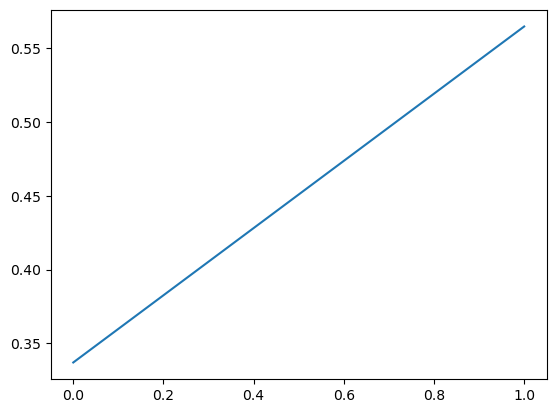

In [14]:
X_MCP=df5.drop(['Name','SMILE'], axis=1)
X_MCP_scaled=StandardScaler().fit_transform(X_MCP)
X_MCP_scaled2=pd.DataFrame(X_MCP_scaled).fillna(0)
pca_MCP = PCA(n_components = 2)
X2D_MCP = pca_MCP.fit_transform(X_MCP_scaled2)
cumsum_MCP = np.cumsum(pca_MCP.explained_variance_ratio_)
print(X2D_MCP,cumsum_MCP)
plt.plot(cumsum_MCP)

In [15]:
pd.DataFrame(X2D_MCP,index=MCP_SMILES).to_csv('df_MCPs_pca_mordred_sterimol.csv')

[[-11.1311805   15.38717064]
 [ 15.89802239  -7.73504093]
 [-14.04107488  -7.91313079]
 [-11.03618398  15.59494344]
 [ 35.81939383   5.36416106]
 [-10.48147802 -10.82665334]
 [ -5.02749884  -9.87145008]] [0.51795284 0.72521869]


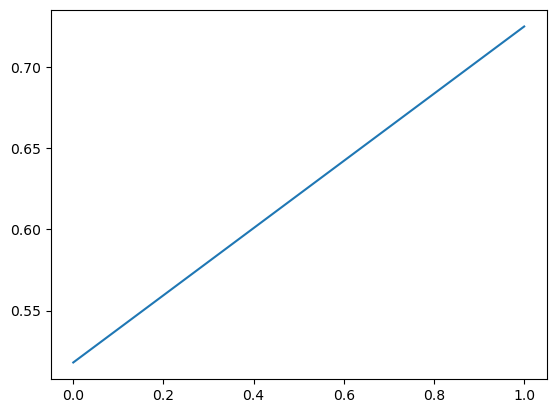

In [10]:
X_additives=df4.drop(['Name','SMILE'], axis=1)
X_additives_scaled=StandardScaler().fit_transform(X_additives)
X_additives_scaled2=pd.DataFrame(X_additives_scaled).fillna(0)
pca_additives = PCA(n_components = 2)
X2D_additives = pca_additives.fit_transform(X_additives_scaled2)
cumsum_additives = np.cumsum(pca_additives.explained_variance_ratio_)
print(X2D_additives,cumsum_additives)
plt.plot(cumsum_additives)

In [24]:
pd.DataFrame(X2D_additives,index=additives_SMILES).to_csv('df_additives_pca_mordred_new.csv')

NameError: name 'X2D_additives' is not defined

[[ 14.31421122  -1.63442895]
 [ -8.36486734  28.17894833]
 [ 31.96498784  -4.39195348]
 [-16.12391177 -14.68563103]
 [-21.79041995  -7.46693486]] [0.58207193 0.89365835]


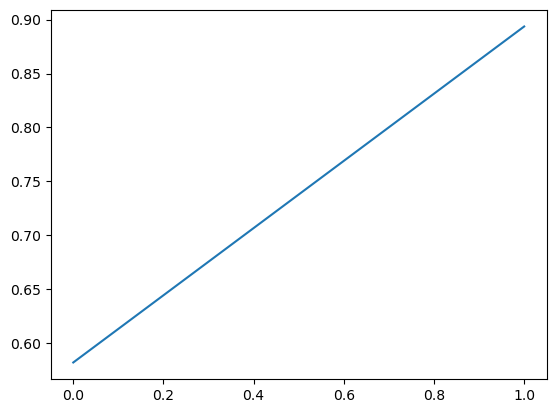

In [24]:
X_cosolvent=df1.drop(['Name','SMILE'], axis=1)
X_cosolvent_scaled=StandardScaler().fit_transform(X_cosolvent)
pca_cosolvent = PCA(n_components = 2)
X2D_cosolvent = pca_cosolvent.fit_transform(X_cosolvent_scaled)
cumsum_cosolvent = np.cumsum(pca_cosolvent.explained_variance_ratio_)
print(X2D_cosolvent,cumsum_cosolvent)
plt.plot(cumsum_cosolvent)
pd.DataFrame(X2D_cosolvent,index=cosolvent_SMILES).to_csv('df_cosolvent_pca_mordred_sterimol.csv')

[[  1.2167367    0.53594854]
 [ -0.40451351   0.70107669]
 [ -8.17746367  -0.92474851]
 [-15.62634673   9.61611704]
 [-12.21610681  -6.27924693]
 [ 13.17525075  -5.84847326]
 [ -1.42345779  -2.32283512]
 [ -6.90796155  -6.38528399]
 [-15.48731716  13.04952631]
 [-10.41032386 -11.93316611]
 [ -8.45321622  -3.86909291]
 [ -9.73176022  -2.38355593]
 [-10.58822511  -2.0722261 ]
 [-15.45709194  18.60670191]
 [ 10.03831124   2.72251139]
 [  2.61868239 -13.17234088]
 [ 38.6158785    5.60952712]
 [ 20.73718117  -6.40014108]
 [ 28.48174381  10.74970182]] [0.40471418 0.52146754]


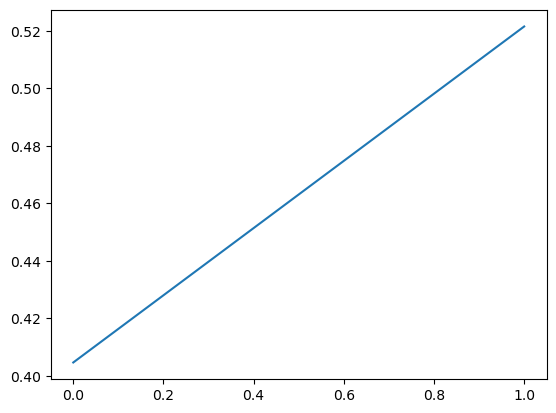

In [22]:
X_catalyst=df3.drop(['Name','SMILE'], axis=1)
X_catalyst_scaled=StandardScaler().fit_transform(X_catalyst)
X_catalyst_scaled2=pd.DataFrame(X_catalyst_scaled).fillna(0)
pca_catalyst = PCA(n_components = 2)
X2D_catalyst = pca_catalyst.fit_transform(X_catalyst_scaled2)
cumsum_catalyst = np.cumsum(pca_catalyst.explained_variance_ratio_)
print(X2D_catalyst,cumsum_catalyst)
plt.plot(cumsum_catalyst)
pd.DataFrame(X2D_catalyst,index=Catalyst_SMILES).to_csv('df_catalyst_pca_mordred_sterimol.csv')

[[-11.2312595   -9.07149976]
 [-10.63284633  -3.17806143]
 [-14.97327291  -7.6490818 ]
 [ -1.75574944   6.47312942]
 [ -0.15428172  13.24025295]
 [  8.017946    20.22548151]
 [ 10.2443772    7.70861653]
 [ 17.10765351   0.25635035]
 [ 51.05607948 -17.74595545]
 [-12.15940052  -2.93111641]
 [-26.10750752 -16.58978902]
 [ -6.42920977   5.05383681]
 [ -2.98252848   4.20783632]] [0.45159748 0.60284989]


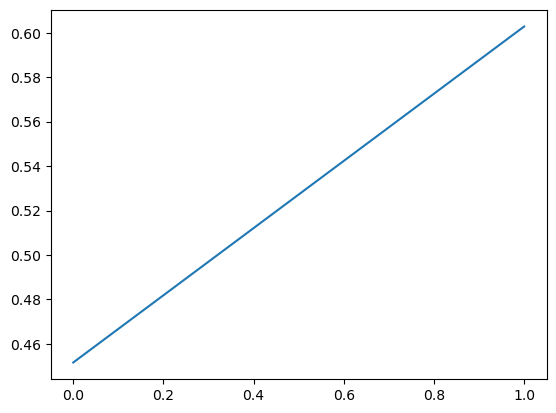

In [23]:
X_solvent=df2.drop(['Name','SMILE'], axis=1)
X_solvent_scaled=StandardScaler().fit_transform(X_solvent)
pca_solvent = PCA(n_components = 2)
X2D_solvent = pca_solvent.fit_transform(X_solvent_scaled)
cumsum_solvent = np.cumsum(pca_solvent.explained_variance_ratio_)
print(X2D_solvent,cumsum_solvent)
plt.plot(cumsum_solvent)
pd.DataFrame(X2D_solvent,index=solvent_SMILES).to_csv('df_solvent_pca_mordred_sterimol.csv')

In [16]:
sum(pca_rdkit.explained_variance_ratio_)

NameError: name 'pca_rdkit' is not defined

In [34]:
cumsum_rdkit = np.cumsum(pca_rdkit.explained_variance_ratio_)
cumsum_rdkit

array([0.45256415, 0.60441625, 0.69887266])

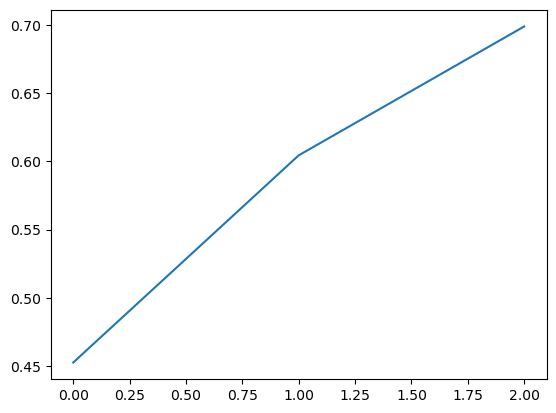

In [36]:
plt.plot(cumsum_rdkit)